In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('second measurments.csv')
df.head()

,Time t / s,Voltage U_B1 / V,Temperature &J_A11 / °C,Temperature &J_A12 / °C
0,0.000,4.98,20.271380,22.985685
1,0.101,4.98,20.271380,23.086787
2,0.200,4.98,20.170278,22.985685
3,0.300,4.98,20.170278,23.086787
4,0.399,4.98,20.271380,23.187889


In [19]:
df = df.drop('Voltage U_B1 / V', axis=1)
df.head()

,Time t / s,Temperature &J_A11 / °C,Temperature &J_A12 / °C
0,0.000,20.271380,22.985685
1,0.101,20.271380,23.086787
2,0.200,20.170278,22.985685
3,0.300,20.170278,23.086787
4,0.399,20.271380,23.187889


In [20]:
df = df.rename(columns={'Time t / s': 'Time', 'Temperature &J_A11 / °C': 'Temperature 1 (C)',
                        'Temperature &J_A12 / °C': 'Temperature 2 (C)'})
df.head()

,Time,Temperature 1 (C),Temperature 2 (C)
0,0.000,20.271380,22.985685
1,0.101,20.271380,23.086787
2,0.200,20.170278,22.985685
3,0.300,20.170278,23.086787
4,0.399,20.271380,23.187889


In [21]:
df.info

<bound method DataFrame.info of          Time  Temperature 1 (C)  Temperature 2 (C)
0       0.000          20.271380          22.985685
1       0.101          20.271380          23.086787
2       0.200          20.170278          22.985685
3       0.300          20.170278          23.086787
4       0.399          20.271380          23.187889
...       ...                ...                ...
3893  389.300          22.136365          21.456851
3894  389.399          22.035263          21.456851
3895  389.500          22.136365          21.456851
3896  389.601          22.136365          21.456851
3897  389.699          22.035263          21.456851

[3898 rows x 3 columns]>

In [22]:
df = df.drop_duplicates(subset=['Temperature 1 (C)', 'Temperature 2 (C)'], keep='first', ignore_index=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.info

<bound method DataFrame.info of          Time  Temperature 1 (C)  Temperature 2 (C)
0       0.000          20.271380          22.985685
1       0.101          20.271380          23.086787
2       0.200          20.170278          22.985685
3       0.300          20.170278          23.086787
4       0.399          20.271380          23.187889
...       ...                ...                ...
1087  387.400          22.439671          21.456851
1088  388.100          22.338569          21.456851
1089  388.300          22.237467          21.456851
1090  389.300          22.136365          21.456851
1091  389.399          22.035263          21.456851

[1092 rows x 3 columns]>

In [23]:
df.head(1093)
df = df.drop(index=range(1006,1092))

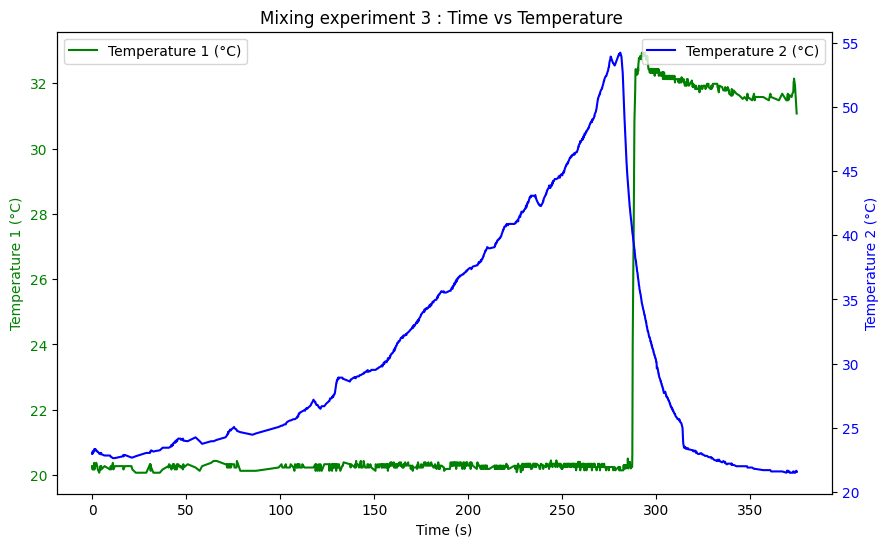

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature 1 (°C)', color='green')
ax1.plot(df['Time'], df['Temperature 1 (C)'], color='green', label='Temperature 1 (°C)')
ax1.tick_params(axis='y', labelcolor='green')
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature 2 (°C)', color='blue')
ax2.plot(df['Time'], df['Temperature 2 (C)'], color='blue', label='Temperature 2 (°C)')
ax2.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Mixing experiment 3 : Time vs Temperature ')
plt.show()